## Part 1: 

Arielle and Boris compete in the little-known sport of pancake flipping, and have both been nominated for this season's "best pancake flipper" award.

Half the people in the pancake flipping league office think Arielle is the better pancake flipper, and the other half think Boris is, so they have retained a data scientist to help solve the issue.

The stats from this season are attached in `part1.csv`. The columns are: 

- the contestant's name, 
- the match day, 
- which hand they used to flip the pancakes, 
- their score (how many pancakes they flipped successfully), and 
- how many total pancakes they attempted to flip

Is Arielle or Boris the better pancake flipper? Justify your decision. Do both sides have a case here?

In [2292]:
import csv
import numpy as np
import pandas as pd
from collections import Counter
import statistics as st
import matplotlib.pyplot as plt
import scipy.stats as spst

#Importing and cleaning
#Turning possible different types of missing values to proper NA format
possible_nas = ["n/a", "na", ""]
pancakes_data = pd.read_csv("coding_exercise_data/part1.csv", na_values = possible_nas)

#Checking to see if there is any missing data we would have to deal with
print("Records that contain null \n", pancakes_data.isnull().sum())

Records that contain null 
 match_day    0
name         0
hand         0
score        0
attempts     0
dtype: int64


Events with fewer than 20 flips 
 Empty DataFrame
Columns: [match_day, name, hand, score, attempts]
Index: []
Left handed attempts Boris: 35
Left handed attempts Arielle: 15
Right handed attempts Boris: 15
Right handed attempts Arielle: 35


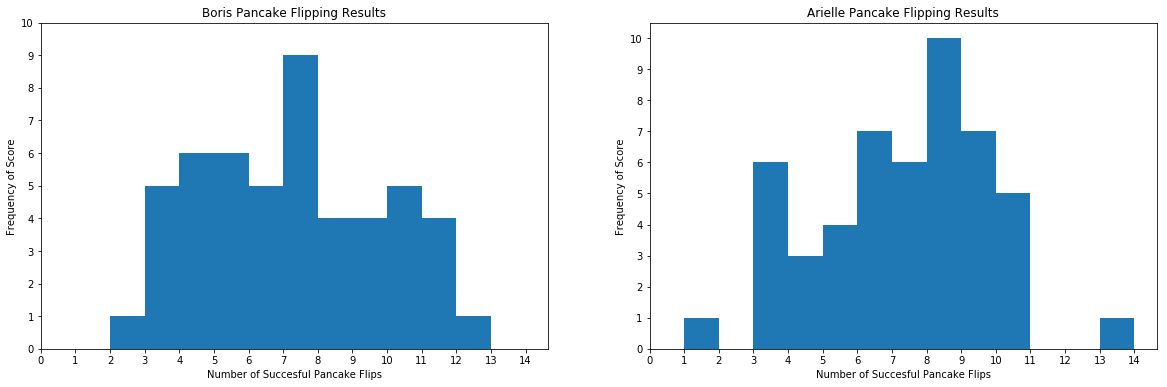

'We can observe from the graphs below that Arielle has the highest maximum score of \n13 pancakes flipped and that Boris has the highest minimum score, never going below \ntwo pancake flips per round. These results are comparable because all rounds have 20 flips.\n'

In [2293]:
#Splitting the results by players for clearer code
boris_results = pancakes_data[pancakes_data.name == "Boris"]
arielle_results = pancakes_data[pancakes_data.name == "Arielle"]

#We now explore the data a bit to have a better understanding of what it looks like

#Want to see if we have the same number of flips for every match 
#Different match types mean different types of comparisons
print("Events with fewer than 20 flips \n", pancakes_data[pancakes_data.attempts != 20])

#Want to see if either relies on a given hand
#We cannot know if this is their dominant hand or if the competition forces these proportions 
print("Left handed attempts Boris:", len(boris_results[boris_results.hand == "L"]))
print("Left handed attempts Arielle:",len(arielle_results[arielle_results.hand == "L"]))

print("Right handed attempts Boris:", len(boris_results[boris_results.hand == "R"]))
print("Right handed attempts Arielle:", len(arielle_results[arielle_results.hand == "R"]))

#Now we graph the distributions of their flips to get an idea of what their reuslts look like
plt.subplot(1, 2, 1)
plt.rcParams['figure.figsize'] = [10, 10]

plt.hist(boris_results.score, bins = range(1, 15))
plt.title("Boris Pancake Flipping Results")
plt.xlabel("Number of Succesful Pancake Flips")
plt.ylabel("Frequency of Score")
plt.xticks(range(0, 15))
plt.yticks(range(0, 11))

plt.subplot(1, 2, 2)
plt.hist(arielle_results.score, bins = range(1, 15))
plt.title("Arielle Pancake Flipping Results")
plt.xlabel("Number of Succesful Pancake Flips")
plt.ylabel("Frequency of Score")
plt.xticks(range(0, 15))
plt.yticks(range(0, 11))
plt.show()

'''We can observe from the graphs below that Arielle has the highest maximum score of 
13 pancakes flipped and that Boris has the highest minimum score, never going below 
two pancake flips per round. These results are comparable because all rounds have 20 flips.
'''

Mean Boris: 6.76
Mean Arielle: 6.82
Mean Boris Left Hand: 5.69
Mean Arielle Left Hand: 4.8
Mean Boris Right Hand: 9.27
Mean Arielle Right Hand: 7.69


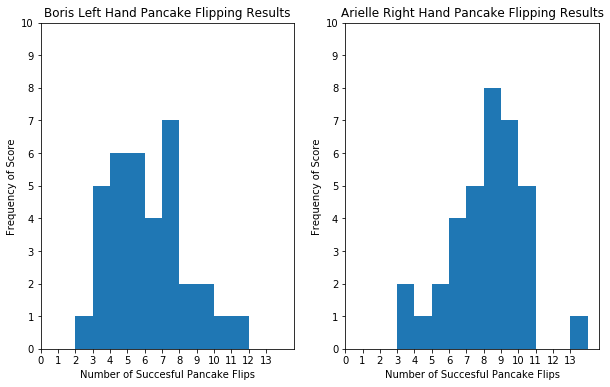

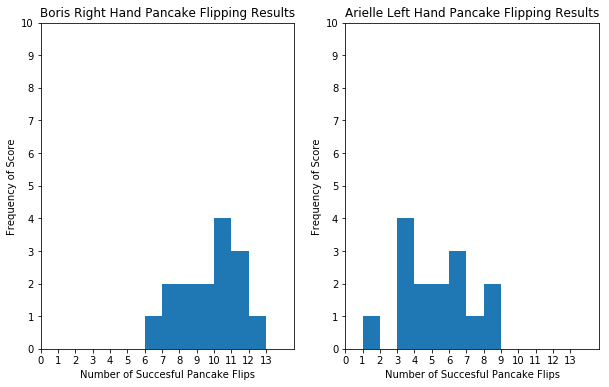

"From the graphs below can see that Arielle is better than Boris when it comes\n to their more used hand. She has higher maximum and minimum scores and her average\n is 2 pancakes higher than Boris'. In contrast, Boris has a better results with his\n right hand than Arielle but does so in 20 fewer attempts."

In [1002]:
'''We can see from the data printed above that each of the competitors competes with
one hand 35 times and with the other 15. Boris uses his left hand 35 times and right hand 15.
Arielle uses her right hand 35 times and her left 15. We can therefore compare their results by hand
type, left or right, or by hand use, more commonly or less commonly used.'''

print("Mean Boris:", round(st.mean(boris_results.score), 2))
print("Mean Arielle:", round(st.mean(arielle_results.score), 2))
print("Mean Boris Left Hand:", round(st.mean(boris_results[boris_results.hand == "L"].score), 2))
print("Mean Arielle Left Hand:", round(st.mean(arielle_results[arielle_results.hand == "L"].score), 2))
print("Mean Boris Right Hand:", round(st.mean(boris_results[boris_results.hand == "R"].score), 2))
print("Mean Arielle Right Hand:", round(st.mean(arielle_results[arielle_results.hand == "R"].score), 2))

plt.subplot(1, 2, 1)
plt.hist(boris_results.score[boris_results.hand == 'L'], bins = range(1, 15))
plt.title("Boris Left Hand Pancake Flipping Results")
plt.xlabel("Number of Succesful Pancake Flips")
plt.ylabel("Frequency of Score")
plt.xticks(range(0, 14))
plt.yticks(range(0, 11))

plt.subplot(1, 2, 2)
plt.hist(arielle_results.score[arielle_results.hand == 'R'], bins = range(1, 15))
plt.title("Arielle Right Hand Pancake Flipping Results")
plt.xlabel("Number of Succesful Pancake Flips")
plt.ylabel("Frequency of Score")
plt.xticks(range(0, 14))
plt.yticks(range(0, 11))
plt.show()

plt.subplot(1, 2, 1)
plt.hist(boris_results.score[boris_results.hand == 'R'], bins = range(1, 15))
plt.title("Boris Right Hand Pancake Flipping Results")
plt.xlabel("Number of Succesful Pancake Flips")
plt.ylabel("Frequency of Score")
plt.xticks(range(0, 14))
plt.yticks(range(0, 11))

plt.subplot(1, 2, 2)
plt.hist(arielle_results.score[arielle_results.hand == 'L'], bins = range(1, 15))
plt.title("Arielle Left Hand Pancake Flipping Results")
plt.xlabel("Number of Succesful Pancake Flips")
plt.ylabel("Frequency of Score")
plt.xticks(range(0, 14))
plt.yticks(range(0, 11))
plt.show()


plt.rcParams['figure.figsize'] = [10, 6]

'''From the graphs below can see that Arielle is better than Boris when it comes
 to their more used hand. She has higher maximum and minimum scores and her average
 is 2 pancakes higher than Boris'. In contrast, Boris has a better results with his
 right hand than Arielle but does so in 20 fewer attempts.'''

In [2294]:
'''Lastly, we will look at the number of direct competitions each has won.'''

boris_wins = 0
arielle_wins = 0

for match in boris_results.match_day:
    boris_score = boris_results[boris_results.match_day == match].score.values
    arielle_score = arielle_results[arielle_results.match_day == match].score.values
    
    if  boris_score > arielle_score:
        boris_wins += 1
    elif arielle_score > boris_score:
        arielle_wins += 1
        
print("Boris has had ", boris_wins, " wins")
print("Arielle has had ", arielle_wins, " wins")

'''We can also see that they each have 23 wins, meaning that they had tied 4 times. It is clear that both Boris and 
Arielle can be considered the better pancake flipper. They have very similar mean score and each have won the same
number of competitions. Also, Boris seems to be better with his right hand while Arielle is better with her left. 
Moreover, Arielle has higher maximums but also has lower minimums while Boris is more consist with his flips.'''

Boris has had  23  wins
Arielle has had  23  wins


'We can also see that they each have 23 wins, meaning that they had tied 4 times. It is clear that both Boris and \nArielle can be considered the better pancake flipper. They have very similar mean score and each have won the same\nnumber of competitions. Also, Boris seems to be better with his right hand while Arielle is better with her left. \nMoreover, Arielle has higher maximums but also has lower minimums while Boris is more consist with his flips.'

## Part 2: 

A restaurant app has a set of check-ins for restaurants in London, UK and is trying to determine which restaurant is the most popular. They have data in the form of a row-oriented JSON hash with keys: `user_id, timestamp, place_id, postal_code`.

Using the data in `part2.json`, identify the **most popular** place in each zipcode. Explain your method and your reasoning.


In [2344]:
#Will be for some of the data manipiulation
import calendar
import string

#Import the data from JSON - Need lines = True because it is NDJson
location_data = pd.read_json("coding_exercise_data/part2.json", lines = True)
print("Records that contain null \n", location_data.isnull().sum())

Records that contain null 
 place_id       0
postal_code    0
timestamp      0
user_id        0
dtype: int64


In [2120]:
'I have split a lot of this problem into functions so that it can be reused for Part 3'

'I have split a lot of this problem into functions so that it can be reused for Part 3'

In [2345]:
#Create function which turns a timestamp into a type of meal so that we can add this information to datframe
def hour_to_meal(times, meal_times):   
    meal_type = []

    for time in times:
        if time.hour < 6:
            meal_type.append(meal_times[0])
        elif time.hour < 12:
            meal_type.append(meal_times[1])
        elif time.hour < 18:
            meal_type.append(meal_times[2])
        else:
            meal_type.append(meal_times[3])

    return meal_type

'''Add two new columns to the data that keep track of the day of the week on which a checkin occurred and at
what meal time it occurred. The meal times were split into 4 categories: Breakfast, Lunch, Dinner and Late Night.
I made this decision because I assumed different resturants have different specifics. I also thought it would
be important to look at this feature because popularity might depend on the time of day and day of the week. Knowing
this will allow us to target our audience more precisely.'''
def transform_data(checkin_data):
    
    #Turn the timestamps into datetime for easier analysis and ensure they are in UTC since that is London time        
    checkin_data.timestamp = pd.to_datetime(checkin_data.timestamp, unit='s', utc = True)

    #Define 4 types of meal times so that we can separate the restaurants based on meal time popularity
    meal_times = ["Late Night", "Breakfast", "Lunch", "Dinner"]

    #Create list of the unique postal codes. Create objected for clearer code below
    unique_pcodes = checkin_data.postal_code.unique()

    #Created new dataframe columns in case we want to use this data for multiple types of analysis later on
    #Could save memory but just doing these operations at the end when graphing the data but this way the code 
    #is clearer
    checkin_data['weekday'] = checkin_data.timestamp.dt.day_name()
    checkin_data['meal'] = hour_to_meal(checkin_data.timestamp, meal_times)
    
    return unique_pcodes, checkin_data, meal_times

In [2346]:
#This function separates the data we want based on the postal code
def extract_data(unique_pcodes, checkin_data, meal_times):
    
    #Dictionary that will hold the data for each individual postal code
    pcode_dict = dict.fromkeys(unique_pcodes, None)

    #Wanted to look at the most recent time stamp because it is a simple way to determine if some of our checkins are outdated
    most_recent = max(checkin_data.timestamp)
    
    #Loop through all the postal codes and extract the data we are interested in
    for code in unique_pcodes:  

        #find better names for this
        user_data = checkin_data[checkin_data.postal_code == code].groupby('place_id').user_id
        checkin_times = checkin_data[checkin_data.postal_code == code].groupby('place_id').timestamp

        #Array that holds the checkin data for each day. Decided array is ok because days of week are sequential arr[0] = Monday
        checkins_by_day = []
        for day in calendar.day_name[0:7]:
            checkins_by_day.append(checkin_data[(checkin_data.postal_code == code) & (checkin_data.weekday == day)].groupby('place_id').user_id.count())

        #Once again ok to use array because the meal types are in chronological order so easy to remember
        checkins_by_meal = []
        for meal_time in meal_times:
            checkins_by_meal.append(checkin_data[(checkin_data.postal_code == code) & (checkin_data.meal == meal_time)].groupby('place_id').user_id.count())

        #This is the data structure that will hold the information found for each postal copde 
        zone_dict = {
            'total_checkins': user_data.count(),
            'unique_checkins': user_data.nunique(),
            'daily_checkins': round(user_data.count() / (checkin_times.max() - checkin_times.min())[0].days, 2),

            #Keeps track of the actual checkins on each week day
            'checkins_by_day': checkins_by_day,
            'checkins_by_meal': checkins_by_meal,
            'data_age': most_recent - checkin_times.min()
        }

        place_ids = checkin_data[checkin_data.postal_code == code].place_id.unique()
        #Assign the data found for this postal code to the dictionary that holds all the data
        pcode_dict[code] = zone_dict
       
    #return dictionary containing the data for each postal code
    return pcode_dict
    

The following are the graphs for postal code SW15


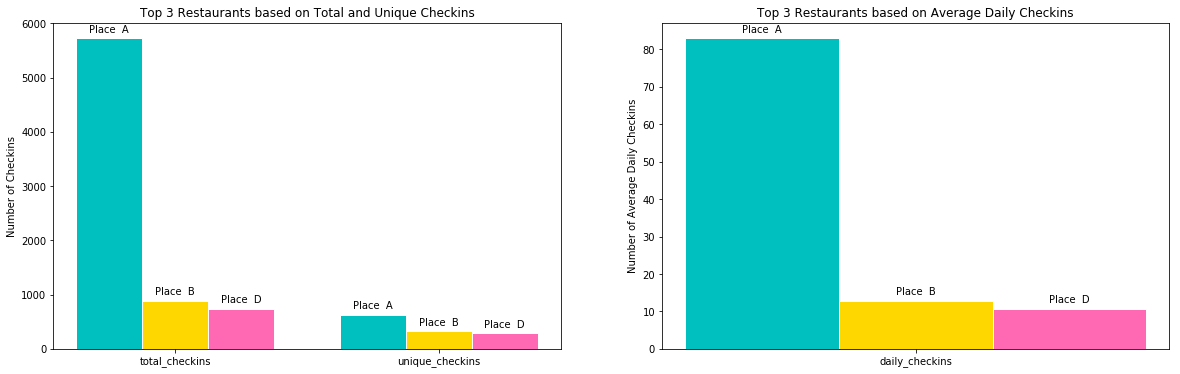

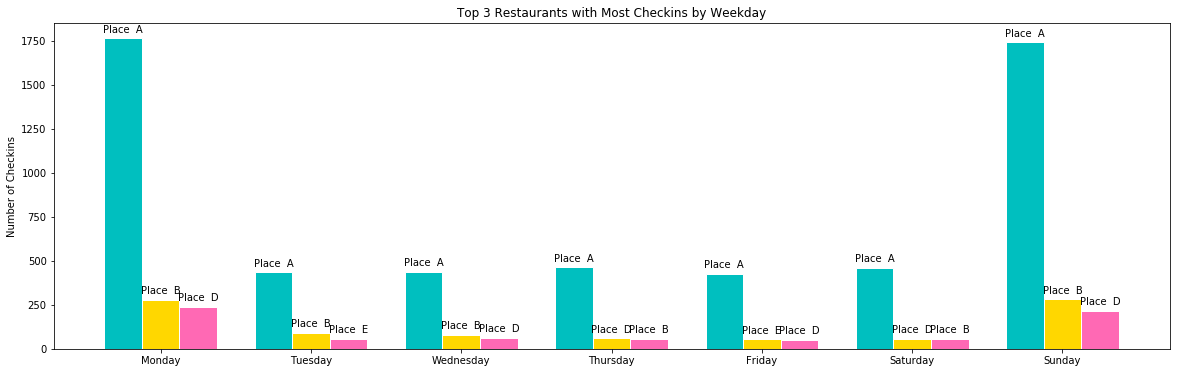

The following are the place ids of the labels used in the graphs above. 

Place  B :  dd5090ef-7a2a-4442-8034-7fb86938ff34
Place  D :  ea0bdf07-9296-464d-8d01-e353900fd94a
Place  A :  fe2958af-c764-4534-9b68-40e44b77e162



The following are the graphs for postal code SW18


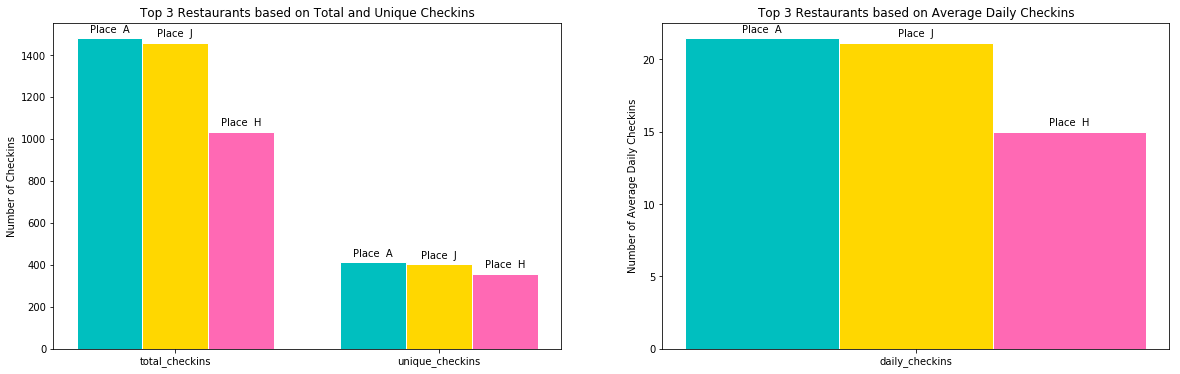

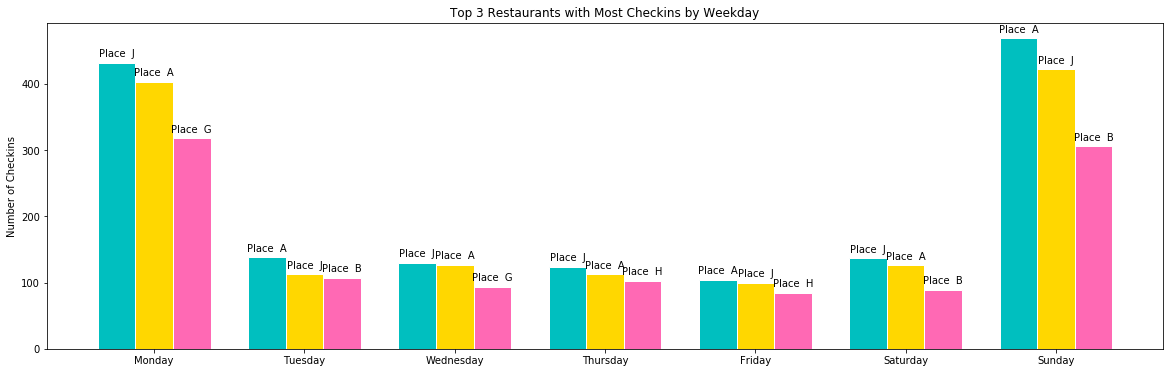

The following are the place ids of the labels used in the graphs above. 

Place  J :  0d91808e-fc84-4023-b5ad-55d91864c3b9
Place  A :  f540d154-78d8-4f6a-a07b-ba1082bc94d6
Place  H :  e9f2ade7-d3f1-4668-ae25-050f134c1dea



The following are the graphs for postal code E2


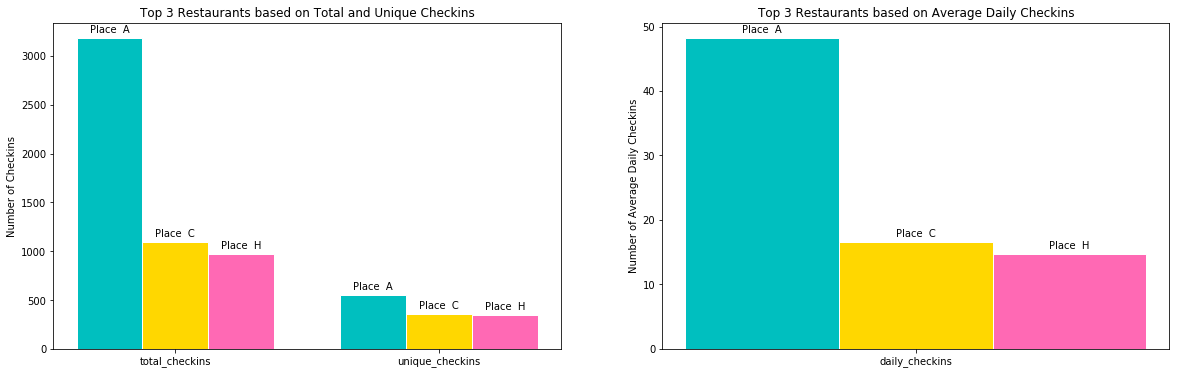

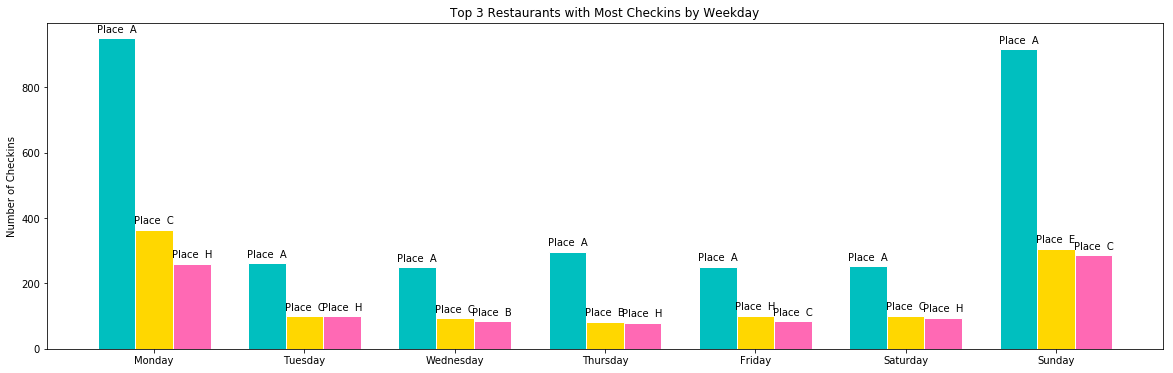

The following are the place ids of the labels used in the graphs above. 

Place  H :  7e66880d-567e-49df-af4d-3d14c810065d
Place  C :  b6952e61-969e-423b-b4f4-4e9f70337ba8
Place  A :  b51746ef-a031-4eef-9a37-836b478c9f11



The following are the graphs for postal code E4


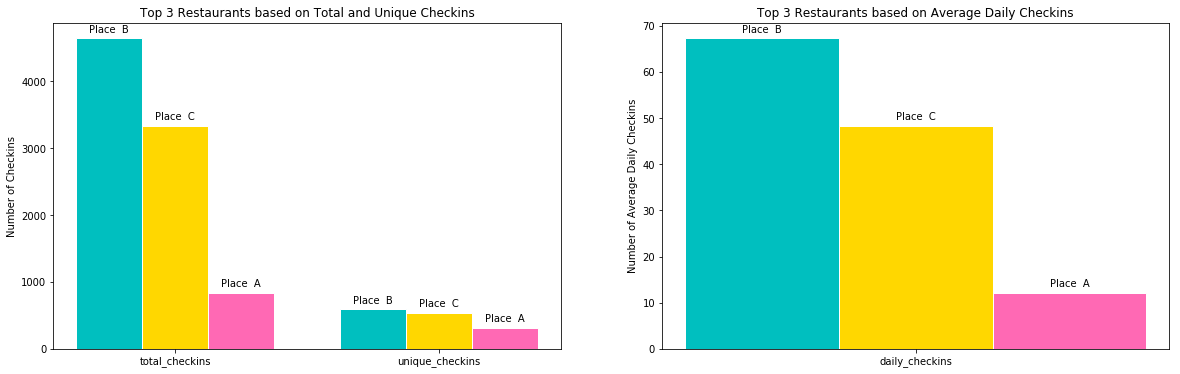

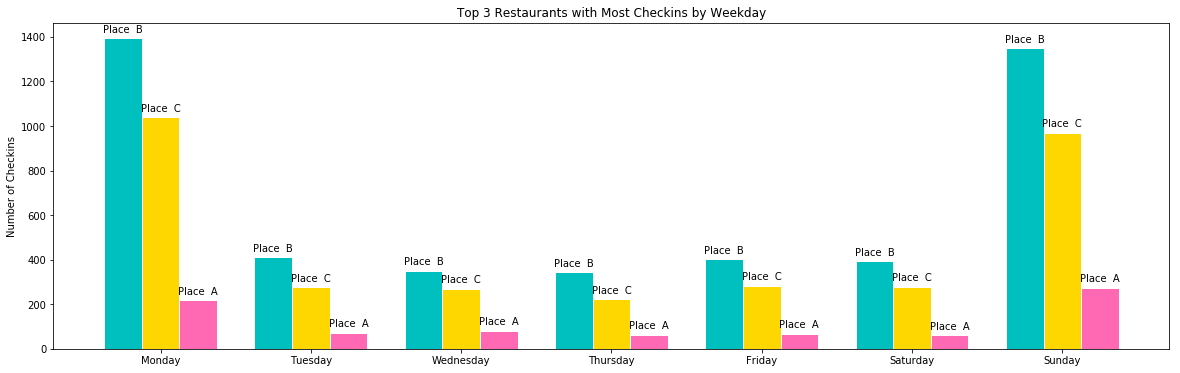

The following are the place ids of the labels used in the graphs above. 

Place  A :  d40da15d-3f97-438c-b9bb-8e1f7ceca2a7
Place  B :  f2f57264-ce10-43d7-a336-0d995dfb02e8
Place  C :  6c2d55ca-a082-408d-8fab-d6a6b13ec122



The following are the graphs for postal code W6


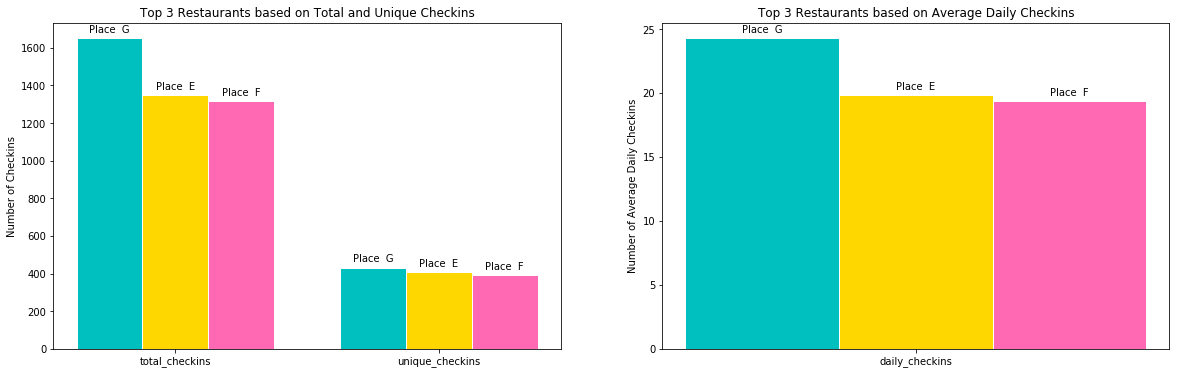

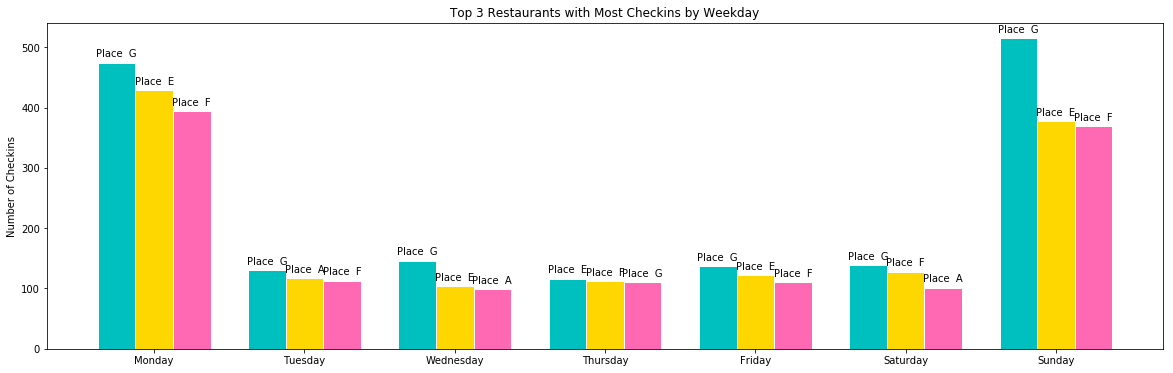

The following are the place ids of the labels used in the graphs above. 

Place  F :  3902fce1-0e79-44a4-9e41-8ef235351cd4
Place  E :  d580fc7f-9348-44f0-9ef4-9f843897ae8f
Place  G :  63c97a8b-5d73-4f6e-bb5a-ab8a3cc6e990





In [2348]:
#Function to label the bars in the barplots to follow. It was adapted based on a function found online.
def autolabel(rects, keys, popularity_dict, start, jump):
    pos = start
    for rect in rects:
        height = rect.get_height()
        plt.annotate('{}'.format(popularity_dict[keys[pos]]),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 4), textcoords="offset points", ha='center', va='bottom')
        pos += jump

#Function that builds grouped barplots of the top three restaurants in each category.
def prepare_graph(data, columns, places, colors, char_arr, unique_places):
    
    #Sort the resturants based on popularity for each category
    best_restaurants = []
    for col in data:
        best_restaurants.append(col.sort_values(ascending = False))

    #Set maximum value for the coming iteration, cannot iterate more times than the number of restaurants.
    for i in range(len(best_restaurants)):
        if len(best_restaurants[i]) < places:
            places = len(best_restaurants[i])

    #Extract the values for the top restaurants in each category
    rest_bars = []
    for i in range(places):
        ord_arr = []
        for j in range(len(data)):
            #if len(best_restaurants[j]) >= i:
            ord_arr.append(best_restaurants[j][i])
        rest_bars.append(ord_arr)

    #Create an array with all of the restaurant ids
    key_arr = []
    for i in range(len(data)):
        for j in range(places):
            key_arr.append(best_restaurants[i].keys()[0:places][j])
    
    #Create a dictionary that holds a mapping between the restaurant ID and the label that will be used in the plot.
    #We are using labels because the ids are too long to fit in the graph and can be difficult to read.
    popularity_dict = dict.fromkeys(unique_places, '')    
    i = 0
    for key in unique_places:
        popularity_dict[key] = "Place " + char_arr[i]
        i += 1
    
    #Spacing out the bars so that they do not stack.
    barWidth = 0.25
    pos = [np.arange(len(data))]
    for i in range(places - 1):
        pos.append([x + barWidth for x in pos[i]])
     
    #Creating the bars
    bar_lines = []
    for i in range(places):
        bar_lines.append(plt.bar(pos[i], rest_bars[i], color = colors[i], width=barWidth, edgecolor='white'))
     
    #Writing the xticks
    if len(bar_lines) > 0:
       plt.xticks([r + barWidth for r in range(len(bar_lines[0]))], columns)
    
    #Add the labels to each column
    for i in range(len(bar_lines)):
        autolabel(bar_lines[i], key_arr, popularity_dict, i, places)

    plt.rcParams['figure.figsize'] = [20, 6]
    
    return key_arr, popularity_dict


def build_graphs(unique_pcodes, pcode_dict, checkin_data, check_tag, meal_times, photo):
    
    #Create a character array that will be used to label the bars. The alphabet was not long enough.
    character_arr = []
    for char_f in (' ' + string.ascii_uppercase):
        for char_s in string.ascii_uppercase:
            character_arr.append(char_f + char_s)
               
    #Create the graphs we want for each of the postal codes
    for code in unique_pcodes:
        
        print("The following are the graphs for postal code", code)
        
        #Retrieve all restaurant ids
        unique_places = checkin_data[checkin_data.postal_code == code].place_id.unique()
        colors = ["C", "gold", "hotpink"]

        #Create the first two graphs and place them side by side
        keys = []
        labels = {}
        plt.subplot(1, 2, 1)
        data = [pcode_dict[code]['total_checkins'], pcode_dict[code]['unique_checkins']]
        temp_keys = prepare_graph(data, ['total_checkins', 'unique_checkins'], 3, colors, character_arr, unique_places) 
        plt.title("Top 3 Restaurants based on Total and Unique " + check_tag)
        plt.ylabel("Number of " + check_tag)
        keys.append(temp_keys[0])
        labels.update(temp_keys[1])
        
        plt.subplot(1, 2, 2)
        temp_keys = prepare_graph([pcode_dict[code]['daily_checkins']], ['daily_checkins'], 3, colors, character_arr, unique_places)
        plt.title("Top 3 Restaurants based on Average Daily " + check_tag)
        plt.ylabel("Number of Average Daily " + check_tag)
        plt.show()
        keys.append(temp_keys[0])
        labels.update(temp_keys[1])
      
        #Create the third graph
        day_popularity = []
        for elem in pcode_dict[code]['checkins_by_day']:
            day_popularity.append(pd.Series(elem))
        temp_keys = prepare_graph(day_popularity, calendar.day_name[0:7], 3, colors, character_arr, unique_places)
        plt.title("Top 3 Restaurants with Most " + check_tag + " by Weekday")
        plt.ylabel("Number of " + check_tag)
        plt.show()
        labels.update(temp_keys[1])

        if photo == 1:
            #Create the fourth graph
            meal_popularity = []
            for elem in pcode_dict[code]['checkins_by_meal']:
                meal_popularity.append(pd.Series(elem))
            temp_keys = prepare_graph(meal_popularity, meal_times, 3, colors, character_arr, unique_places)
            plt.title("Top 3 Restaurants with Most " + check_tag + " by Meal Time")
            plt.ylabel("Number of " + check_tag)
            plt.show() 
            keys.append(temp_keys[0])
            labels.update(temp_keys[1])

        print("The following are the place ids of the labels used in the graphs above. \n")

        #Combine the labels of all the place ids and then print the ones that are in the graphs.
        unique_keys = []
        for arr in keys:
            for key in arr:
                unique_keys.append(key)

        
        unique_keys = list(set(unique_keys))
        for key in list(set(unique_keys)):
            print(labels[key], ': ', key)
        print('\n\n')

            
def main(checkin_data, check_tag, photo):
    
    #Add new columns: meal and day of the week
    unique_pcodes, checkin_data, meal_times = transform_data(checkin_data)
    
    #Extract the data for each postal code
    pcode_dict = extract_data(unique_pcodes, checkin_data, meal_times)
    
    #Print the results
    build_graphs(unique_pcodes, pcode_dict, checkin_data, check_tag, meal_times, photo)
    

main(location_data, "Checkins", 0)


In [2134]:
'''We can see that for postal code SW15, Place A (fe2958af-c764-4534-9b68-40e44b77e162) wins in all categories and is
therefore the most popular. For SW18, Place A (f540d154-78d8-4f6a-a07b-ba1082bc94d6) is the most popular as it also 
wins in all categories except checkins during "Late Night". Please keep in mind that Place A from SW18 and SW15 
are not the same. These are just labels so we can easily observe their results but their scope is limited to 
their specific postal code. For the rest of the postal codes there is a clear winner that also wins in all 
categories. The most popular restaurants are as follows:
SW15: Place A (fe2958af-c764-4534-9b68-40e44b77e162)
SW18: Place A (f540d154-78d8-4f6a-a07b-ba1082bc94d6)
E2: Place A (b51746ef-a031-4eef-9a37-836b478c9f11)
E4: Place B (f2f57264-ce10-43d7-a336-0d995dfb02e8)
W6: Place G (63c97a8b-5d73-4f6e-bb5a-ab8a3cc6e990)
'''

'We can see that for postal code SW15, Place A (fe2958af-c764-4534-9b68-40e44b77e162) wins in all categories and is\ntherefore the most popular. For SW18, Place A (f540d154-78d8-4f6a-a07b-ba1082bc94d6) is the most popular as it also \nwins in all categories except checkins during "Late Night". Please keep in mind that Place A from SW18 and SW15 \nare not the same. These are just labels so we can easily observe their results but their scope is limited to \ntheir specific postal code. For the rest of the postal codes there is a clear winner that also wins in all \ncategories. The most popular restaurants are as follows:\nSW15: Place A (fe2958af-c764-4534-9b68-40e44b77e162)\nSW18: Place A (f540d154-78d8-4f6a-a07b-ba1082bc94d6)\nE2: Place A (b51746ef-a031-4eef-9a37-836b478c9f11)\nE4: Place B (f2f57264-ce10-43d7-a336-0d995dfb02e8)\nW6: Place G (63c97a8b-5d73-4f6e-bb5a-ab8a3cc6e990)\n'

## Part 3:

A photo sharing app has a set of photographs tagged to restaurants in London, UK and is trying to determine which are the most popular restaurants in each postal code. The app maker is worried that there may be some skews, biases, and fraud in their data, and has asked you to investigate. Their data, in `part3.json` has the same schema as the data in `part2.json`. 


**Identify what you consider the most popular places, and note any issues with the data. Explain your reasoning.**

In [2308]:
import time
import statistics
import warnings

warnings.filterwarnings('ignore')
photo_data = pd.read_json("coding_exercise_data/part3.json", lines = True)
photo_data.timestamp = pd.to_datetime(photo_data.timestamp, unit='s')
print("Records that contain null \n", photo_data.isnull().sum())

Records that contain null 
 place_id       0
postal_code    0
timestamp      0
user_id        0
dtype: int64


In [2336]:
#Extract the unique users
unique_users = photo_data.user_id.unique()

#Create array to store the average number of tags per user. Looking for extremely high values that could be bots.
user_tag_avg = np.zeros(len(unique_users))

for i in range(len(unique_users)):
    #Did it this way for efficiency
    timestamps = photo_data[photo_data.user_id == unique_users[i]].timestamp
    total_tags = timestamps.count()

    newest = timestamps.max()
    oldest = timestamps.min()
    
    day_count = (newest - oldest).days
    if day_count == 0:
        day_count = 1
    
    avg_daily_tags = float(total_tags / day_count)
    user_tag_avg[i] = avg_daily_tags


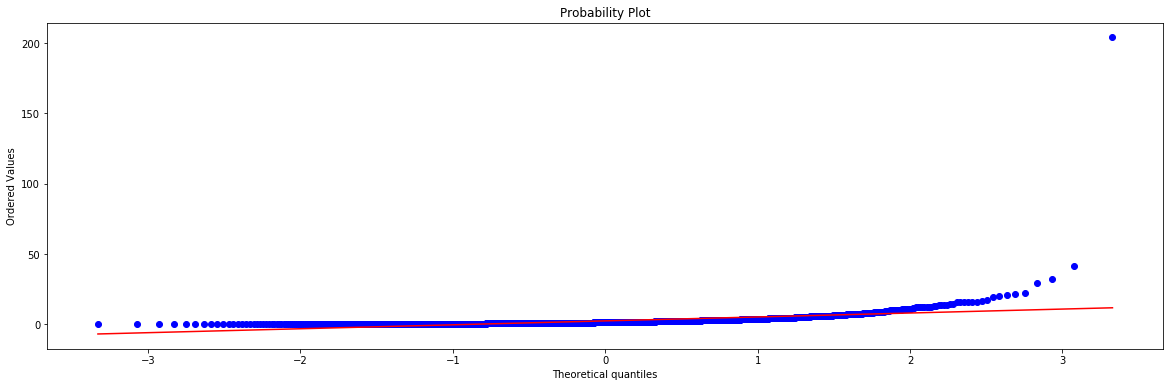

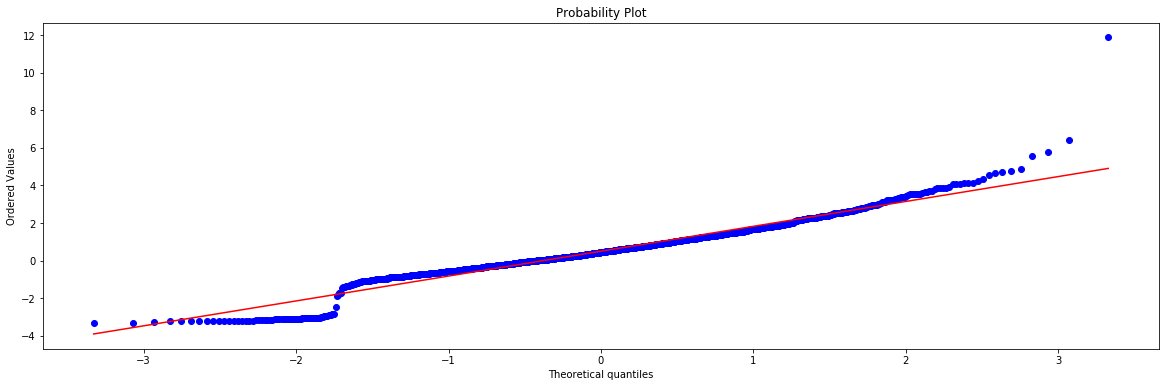

Plot of data to double check if it is normal-looking


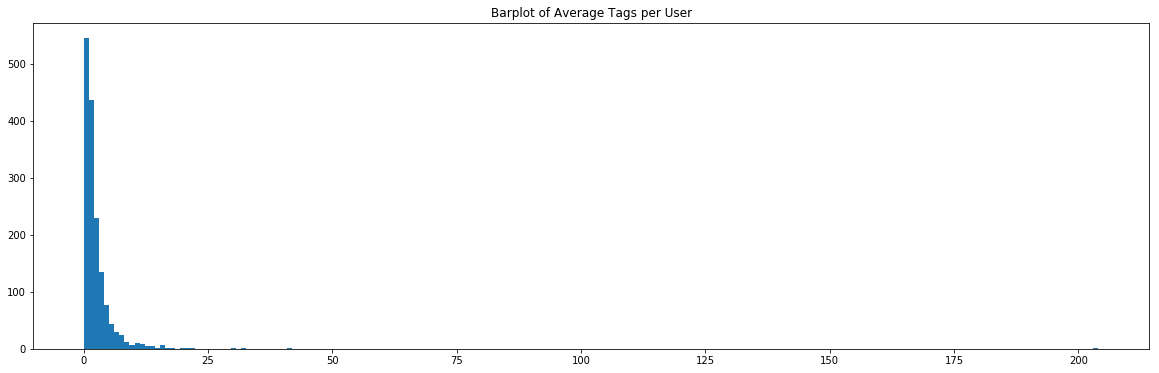

Plot of data to double check if it became more normal-looking


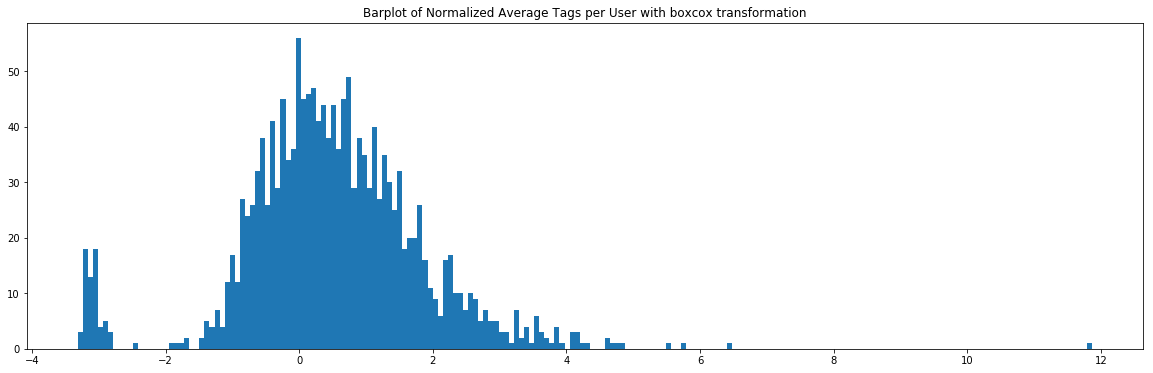

NormaltestResult(statistic=185.0153788748431, pvalue=6.674533908019067e-41)


In [2337]:
#Q-Q plot to see if data is normal
spst.probplot(user_tag_avg, plot = plt)
plt.show()

#boxcox transformation to normalize the data
norm_user_avg = spst.boxcox(user_tag_avg)[0]

#Q-Q plot of transformed data to see if there are improvements
spst.probplot(norm_user_avg, plot = plt)
plt.show() 

#Plot of data to double check if it is "normal-looking"
print('Plot of data to double check if it is normal-looking')
plt.hist(user_tag_avg, bins = 200)
plt.title("Barplot of Average Tags per User")
plt.show()

#Plot of data to double check if it became more "normal-looking"
print('Plot of data to double check if it became more normal-looking')
plt.hist(norm_user_avg, bins = 200)
plt.title("Barplot of Normalized Average Tags per User with boxcox transformation")
plt.show()

#Use the normaltest function to see if the distribution is normal
print(spst.normaltest(norm_user_avg))
#Zscores for each of the data entries
zscore = spst.zscore(norm_user_avg)

#We consider extremes to be those that are 3 standard deviations above the mean
extremes_z = np.where(zscore > 2)

#We do not really see a great improvement - Use IQR instead
first_quartile, third_quartile = np.quantile(user_tag_avg, [0.25, 0.75])
iqr = third_quartile - first_quartile
upper_limit = third_quartile + (1.5 * iqr)

#Find the upper limit of iqr
extremes_iqr = np.where(user_tag_avg > upper_limit)

'''Remove all users that have more tags than our threshold. This removes a significant percentage of
our data but a much smaller percentage of our users. I am ok with this because there is a chance
these users are bots. If they are not, the rest of data should still be ok as long as the users
did not have a very large number of tags for a specific place. Even in that case, the data is better 
without those entries since one person going to a place very often does not really mean it is more
popular. Also, such pictures could have been posted by the restaurant's own social media which would
not have been a sign of popularity'''
clean_photo_data = pd.DataFrame(columns=photo_data.columns)
for user in unique_users[extremes_iqr]:
    clean_photo_data = (photo_data[[user not in unique_users[extremes_iqr] for user in photo_data.user_id]])


The following are the graphs for postal code W11


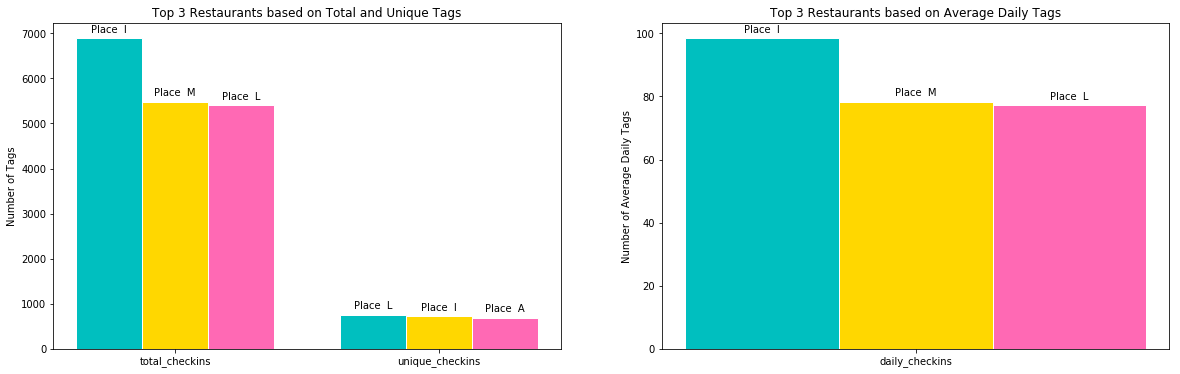

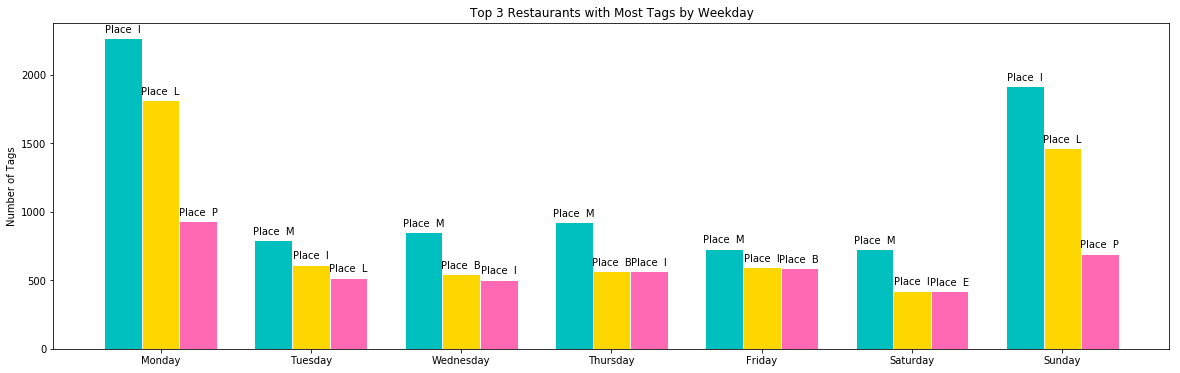

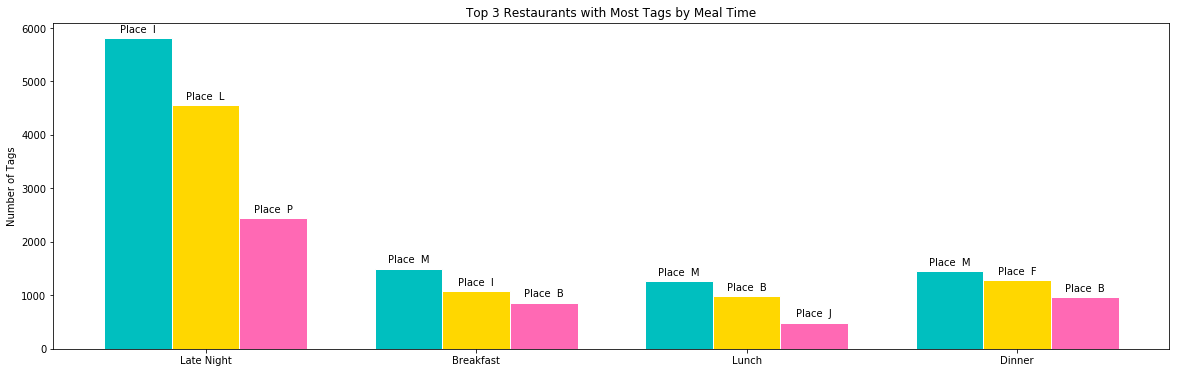

The following are the place ids of the labels used in the graphs above. 

Place  M :  03494af1-27ae-45cd-9692-801e5be8c697
Place  F :  a802b9a2-3ed3-4864-88b3-33b6b47e27bc
Place  J :  0f1aa959-dcae-4e5d-bebe-6e8c32d12b50
Place  I :  2b2b7930-e0ab-4163-b91f-fc49aada8947
Place  L :  c9973243-9658-4dd2-8f0e-c1146ac79f3f
Place  P :  a3976b4f-fb32-4e00-9684-6d9b594f20b6
Place  A :  cc4e591f-55d5-458e-a792-bbd78abd7791
Place  B :  fe643816-9ee5-4540-919c-85f64715f86a



The following are the graphs for postal code SW4


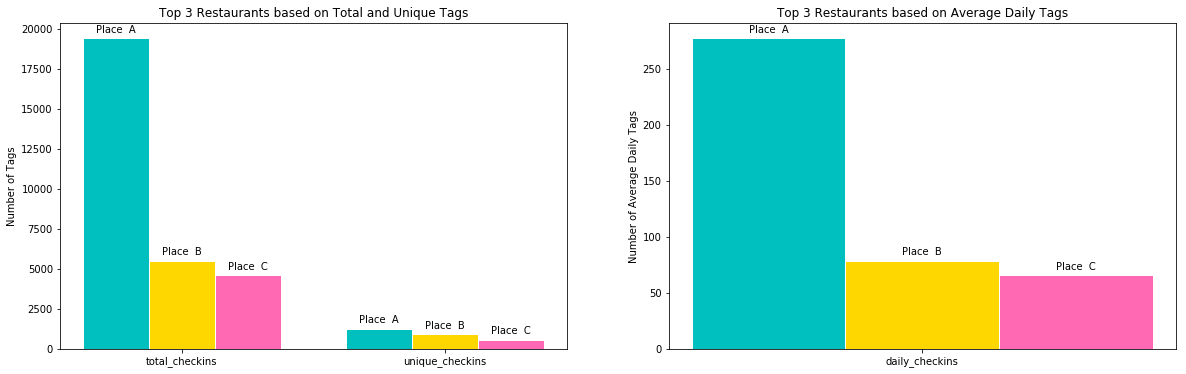

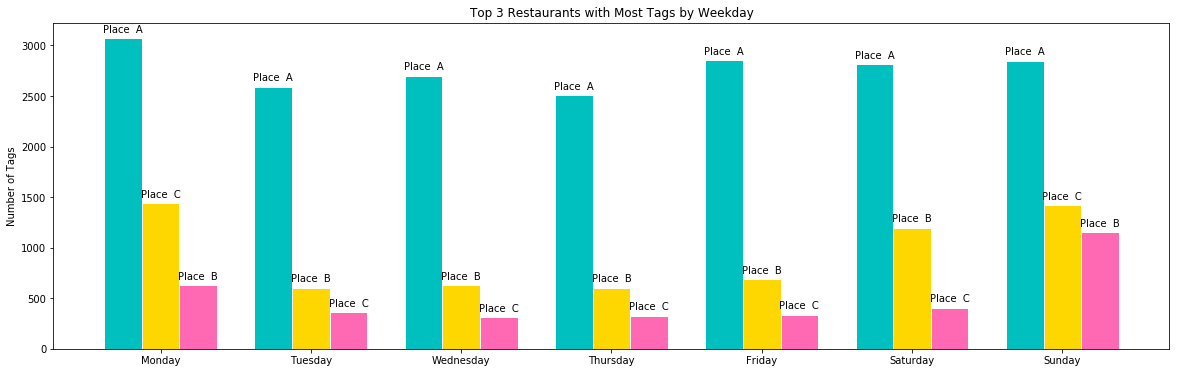

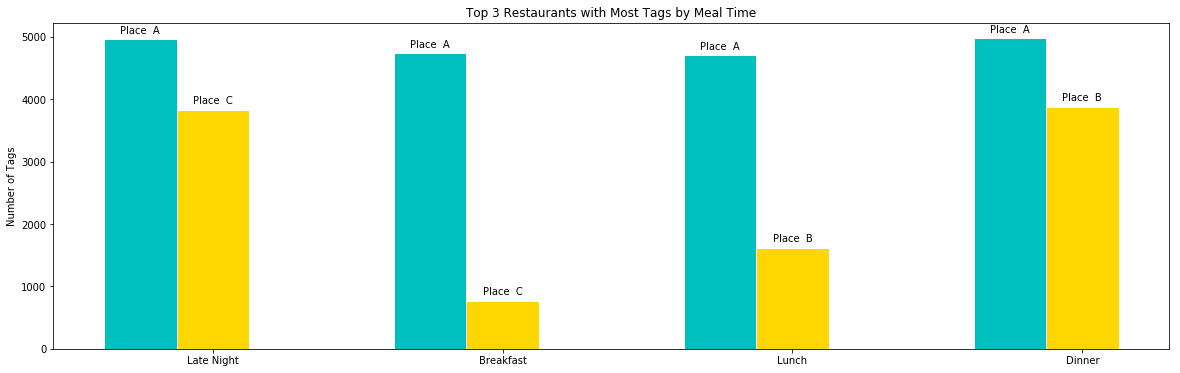

The following are the place ids of the labels used in the graphs above. 

Place  A :  0cd46109-3647-4e76-aad4-e7e19e72172b
Place  B :  5e94b3eb-4cb8-4a9b-8fa6-cdf20ab42544
Place  C :  c0cd0c51-0b88-4fd2-9665-42a87251282e



The following are the graphs for postal code SW14


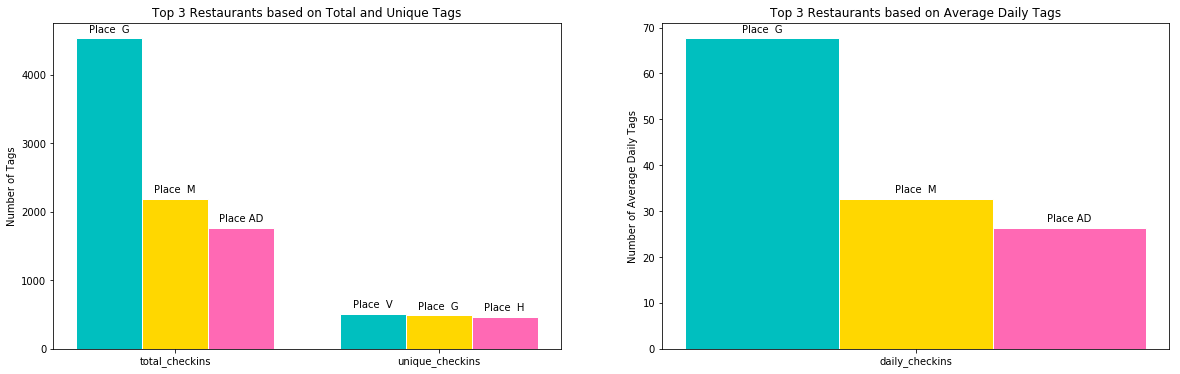

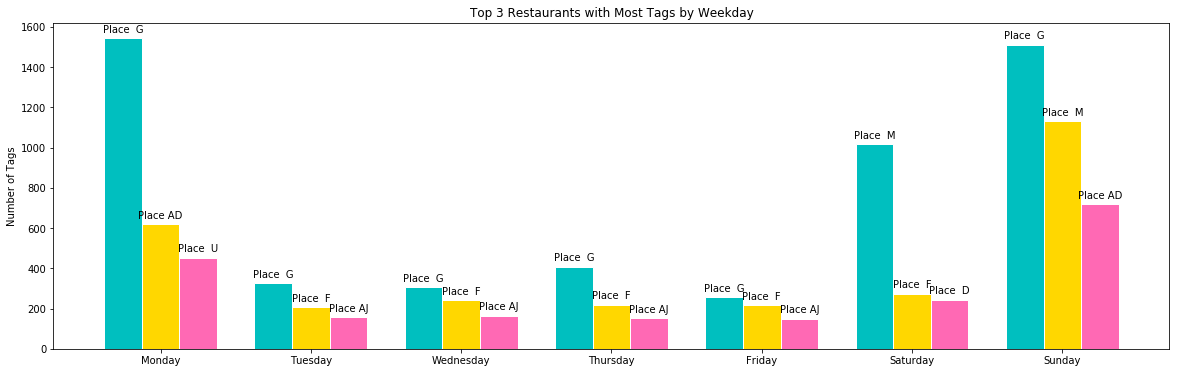

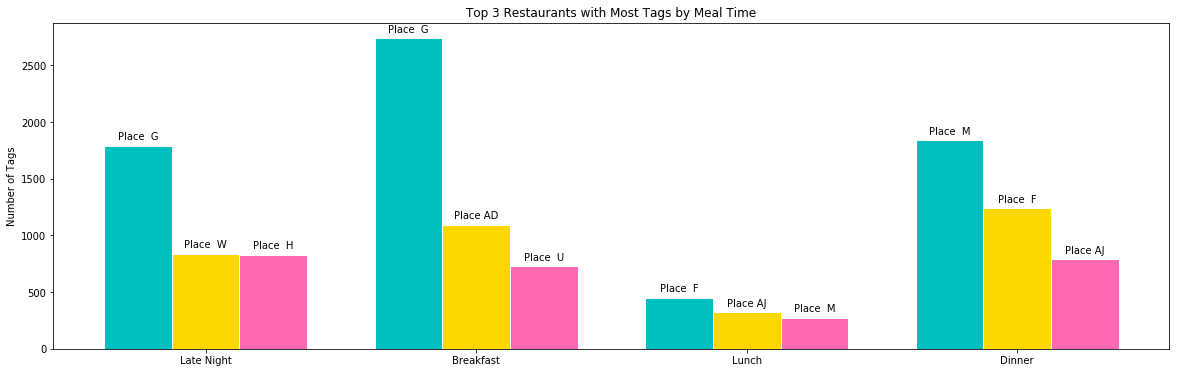

The following are the place ids of the labels used in the graphs above. 

Place AJ :  1324c487-2a87-46d5-96c2-9973f31703e1
Place  G :  990af278-006c-419c-abc1-6efa45c60f38
Place  W :  1d85b16f-849f-4f0c-bbb6-b5b5b94a661c
Place  H :  7d5565ed-b4b1-4005-bb12-52b32a52815b
Place  V :  c3347a40-b4a9-418b-8060-6a144865a4c0
Place AD :  5d38dd29-c2e1-4376-b479-22af64a94a5a
Place  U :  b59046c4-490e-4cd6-b42a-55ff9616cd16
Place  F :  569e5b06-5da5-4ece-8708-f97f01c46a4e
Place  M :  d0813816-c241-43e2-a2da-94384f18c78d



The following are the graphs for postal code SW15


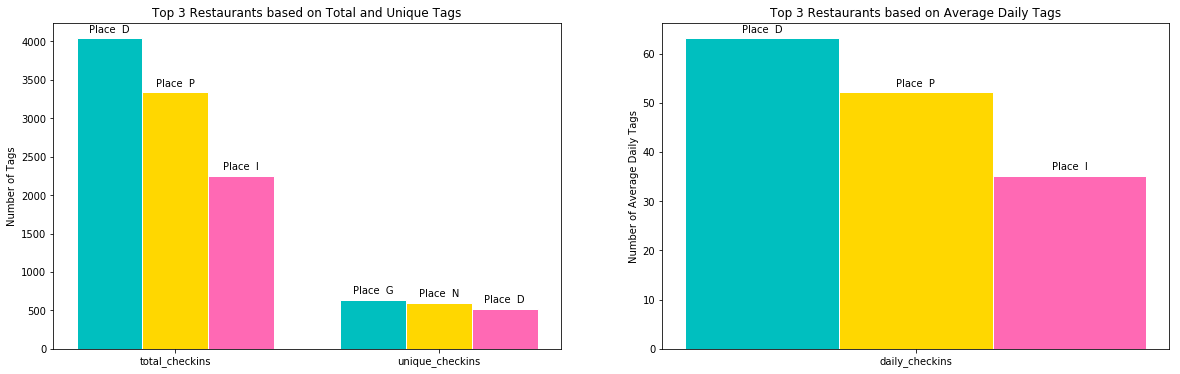

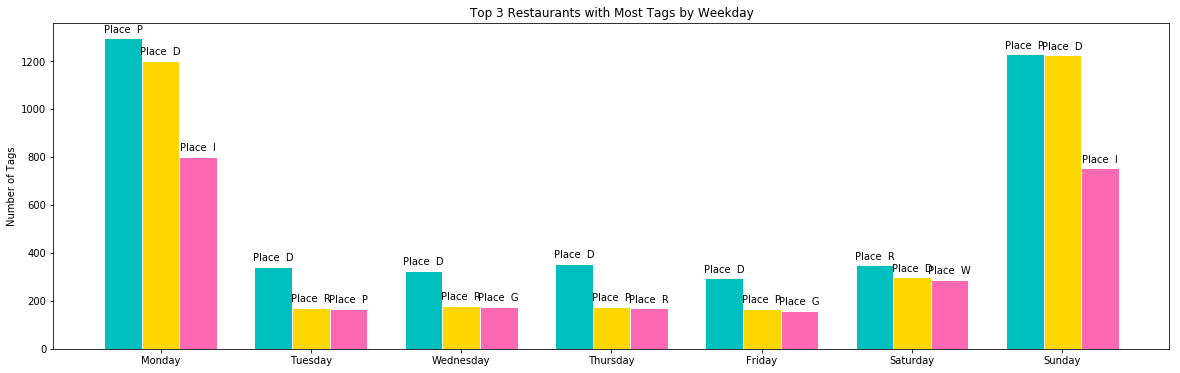

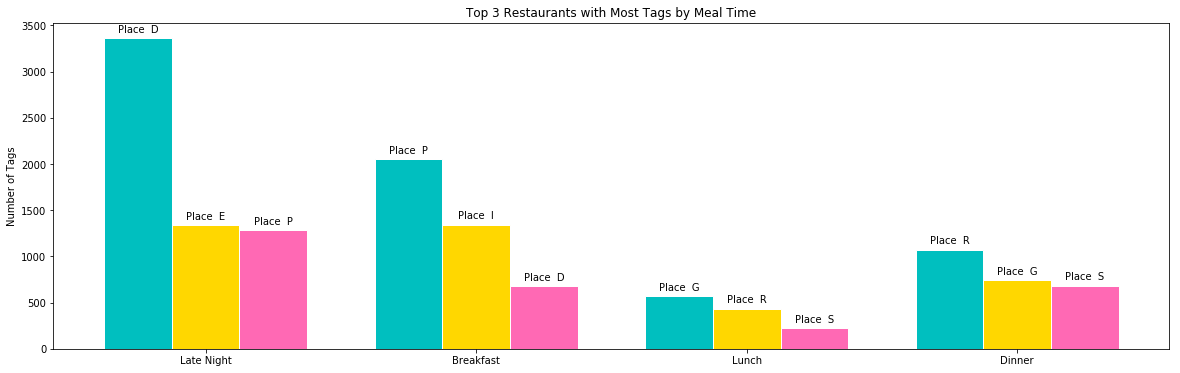

The following are the place ids of the labels used in the graphs above. 

Place  S :  0d749aa2-ddcd-472a-967f-8d4a511b778f
Place  E :  f6fc8c5d-3b6a-40f2-8231-04608d3c7a97
Place  G :  141bbba3-6f6a-4836-8d03-bd1a87e635a7
Place  R :  2b8d23d0-cf5d-4034-821e-5bfab4a5a72b
Place  D :  a336dff1-5982-49a6-a70f-8abb47714d7f
Place  P :  9b8959e5-ecb2-41a6-9ec5-02b266a735fe
Place  I :  997fda76-1825-4592-937e-984afc436269
Place  N :  44d3b239-5d3e-4285-8ee7-7b234da8695c



The following are the graphs for postal code SE22


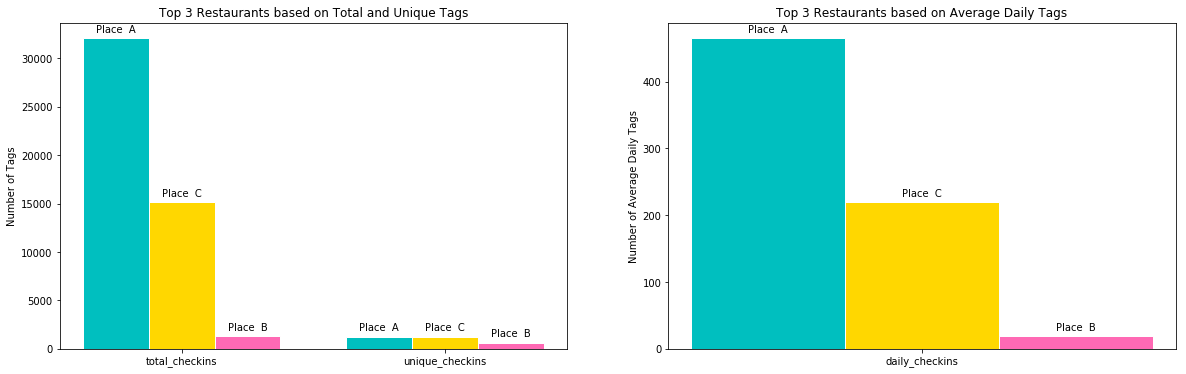

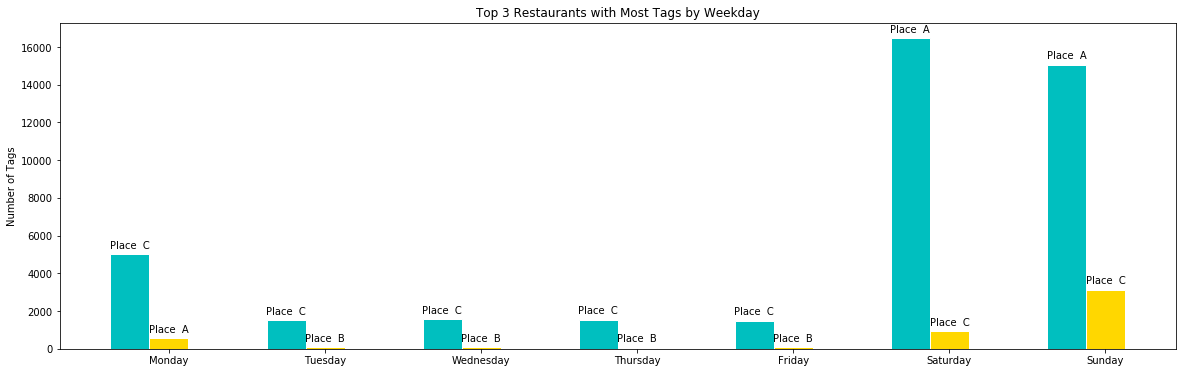

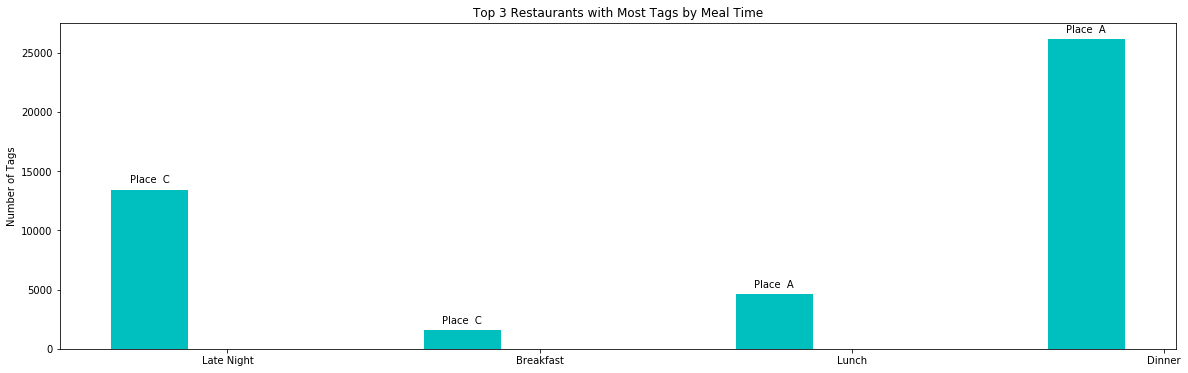

The following are the place ids of the labels used in the graphs above. 

Place  B :  390f135b-9024-45e9-a1cf-6b347fc9f202
Place  C :  d4acb53b-3433-405d-b938-45412ad8b40c
Place  A :  a33cbc9b-8fe3-4984-b6be-de67ea855f81





In [2349]:
'''Remove all data that is too old. Our 'date_age' value that we created in extract data gave us an idea
of how old the data should be. Most data is between 0-70 days old from the most recent data we have. The 
dates tend to be around March, April of 2018 so we just removed anything that is before 2018. This can be
considered outdated and not very relevant to our popularity measurement'''
cleaner_photo_data = clean_photo_data[clean_photo_data.timestamp.dt.year >= 2018]
main(cleaner_photo_data, "Tags", 1)


In [0]:
'''We will now discuss what I believe are the most popular restaurants in each postal code:
W11: Here the winner is fairly clear as Place I dominates total number of tags and average daily
tags and it is almost tied for unique tags. Contenders could be L and M but I is the most popular.
Place  M :  03494af1-27ae-45cd-9692-801e5be8c697
Place  I :  2b2b7930-e0ab-4163-b91f-fc49aada8947
Place  L :  c9973243-9658-4dd2-8f0e-c1146ac79f3f

SW4: Place A is the most popular as it dominates every category.
Place  A :  0cd46109-3647-4e76-aad4-e7e19e72172b

SW14: Here G is the most popular. It wins or ties in the first three categories and also wins most of
week day and meal time brackets.
Place  G :  990af278-006c-419c-abc1-6efa45c60f38

SW15: For this postal code it is difficult to pick a clear winner. Place D has the most tags
and the largest average tags but place G has the most unique tags, therefore having the largest
reach. The P, D and R all have the higest number of tags on certain week days and P, D, G and R
all have the highest number of tags during a given meal time. These last two might be less 
informative than checkin data because people might post photos later. As a result, P and D
are the most popular.
Place  G :  141bbba3-6f6a-4836-8d03-bd1a87e635a7
Place  R :  2b8d23d0-cf5d-4034-821e-5bfab4a5a72b
Place  D :  a336dff1-5982-49a6-a70f-8abb47714d7f
Place  P :  9b8959e5-ecb2-41a6-9ec5-02b266a735fe

SE22: Here the field is split between place D and place A. Place A has overall more tags
and daily tags but their unique tags are very similar. Also D is better during weekdays
and during the Late Night and Breakfast times. On the other hand, A is much better during the 
weekend and for Lunch and Dinner:
Place  D :  d4acb53b-3433-405d-b938-45412ad8b40c
Place  A :  a33cbc9b-8fe3-4984-b6be-de67ea855f81


There are also two other postal codes, NW5 and W8, that appear when we look at clean_photo_data. I
decided that it was ok to omit them. The issue with these is that we cannot know how corrupted
that data is. The dates of many of these entries are before tagging pictures online was even possible.
This means that the timestamp must be wrong. As a result, we cannot know how new this data is and
if any other columns are corrupted.
'''

## Part 4:

A genetics lab has asked you to build a predictive model of mouse length and weight based on genetic variation.

The genetic data is stored in `part4.csv` with each subject as a row, and each genetic variant as a column. The values indicate the number of copies of the genetic variant they have. Since mice have (in general) 2 copies of each of their chromosomes, the numbers will all be 0, 1, or 2.

Each subject's length (in mm) and weight (in grams) is in the columns labeled `length` and `weight`. 

Study the input and output variables, and determine what drives length and weight.

In [2340]:
possible_nas = ["n/a", "na", ""]
mice_data = pd.read_csv("coding_exercise_data/part4.csv", na_values = possible_nas)
print("Records that are missing values: ", sum(mice_data.isnull().sum()))

Records that are missing values:  0


In [2341]:
import sklearn.feature_selection as skfs
from sklearn import linear_model

#PCA

#Extract the two response variables from the data
y_length = mice_data['length']
y_weight = mice_data['weight']
X = mice_data[mice_data.columns[1:5001]]

#Since there are so many variables I wanted to get an idea of what they look like so I made a correlation array
corr_arr = np.empty(5001)
mice_variants = mice_data.columns[1:]

#Did this for both weight and height and looked at most positive and negative correlations to just get an idea of
#what the data looks like.
for i in range(1, 4999):
    corr_matrix = mice_data[[mice_variants[i], 'weight']].corr()
    
    if i > 4998:
        print(corr_matrix['weight'][0])
    corr_arr[i] = corr_matrix.iloc[0]['weight']
    

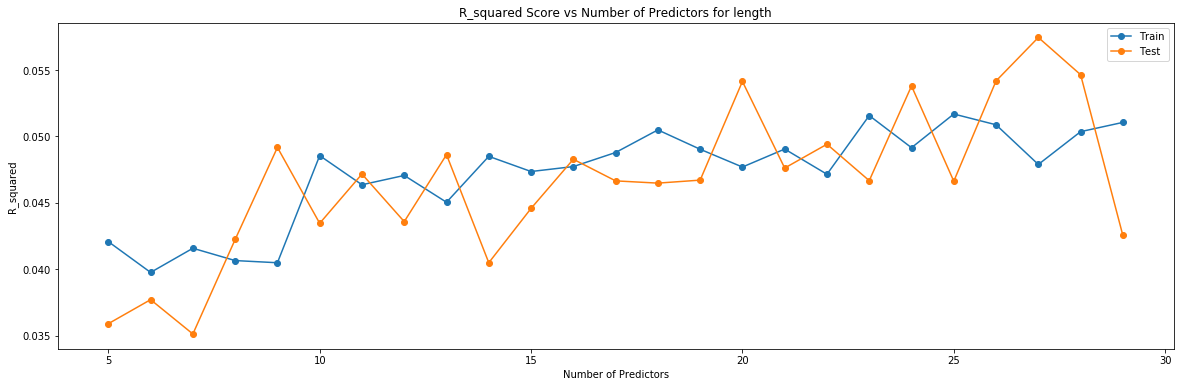

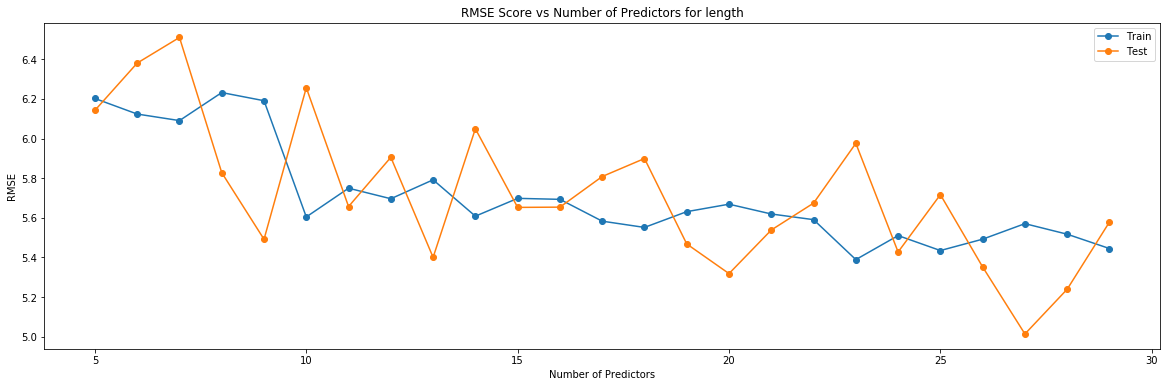

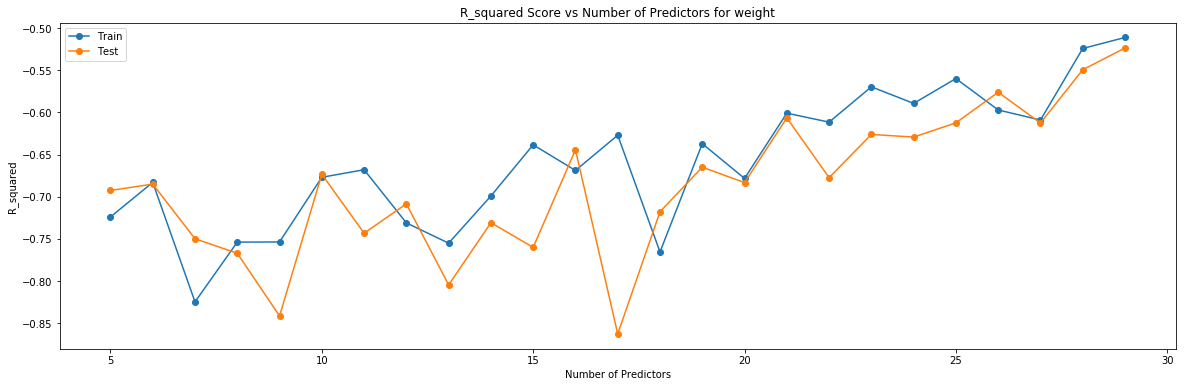

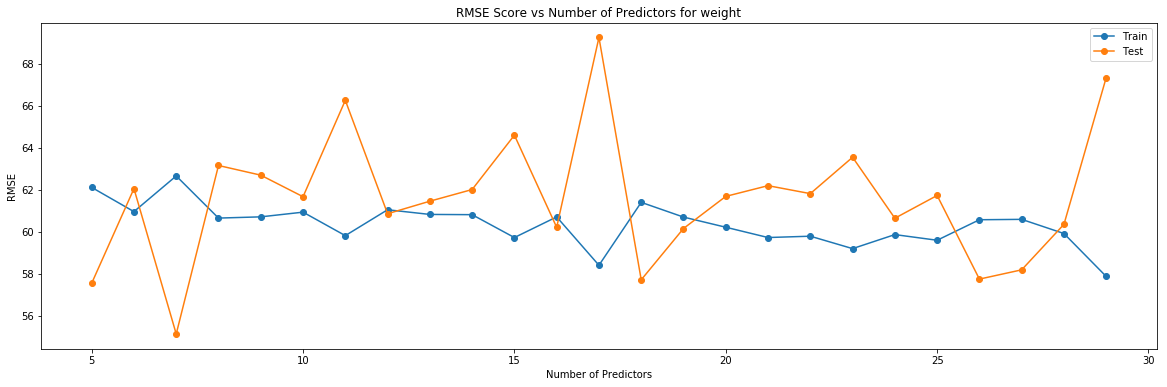

"We can see that our linear regression are not very succesful. We have very low r_squared scores for both of them.\nThe RMSE for length is not horrible but we cannot be sure of our model's validity due to the r_squared. Also, the\nRMSE for weight is very large."

In [2342]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

#Linear regression with selectKBest to reduce predictors
#Ran the regression for both length and weight
for trait in ['length', 'weight']:
    test_r2 = []
    train_r2 = []
    test_rmse = []
    train_rmse = []
    
    y = mice_data[trait]
    
    attempts = 10
    #Loop that changes the hyperparameter K in selectKBest to see how that would affect results 
    for i in range(5, 30):
        for j in range(attempts):

            curr_train_r2 = 0
            curr_test_r2 = 0
            curr_train_rmse = 0
            curr_test_rmse = 0

            #fit the model
            x_skb = SelectKBest(f_regression, k = i).fit(X, y)
            
            #Retrieve the best parameter
            selected = np.where(x_skb.get_support() == True)
            new_x = X[X.columns[selected]]
            features = x_skb.transform(X)

            #Split the data again into test and train but based on the new model
            x_train, x_test, y_train, y_test = train_test_split(new_x, y, test_size=0.2)
            
            #Fit on train data and predict on both test and train to graph and look for overfitting
            reg = linear_model.LinearRegression().fit(x_train, y_train)
            prediction = reg.predict(x_test)
            prediction_train = reg.predict(x_train)
            
            #Calculate root mean squared error and R_squared
            curr_test_rmse += mean_squared_error(prediction, y_test)
            curr_train_rmse += mean_squared_error(prediction_train, y_train)
            curr_test_r2 += r2_score(prediction, y_test)
            curr_train_r2 += r2_score(prediction_train, y_train)

        #Add up score and standardize
        test_r2.append(curr_test_r2/attempts)
        train_r2.append(curr_train_r2/attempts)
        test_rmse.append(curr_test_rmse/attempts)
        train_rmse.append(curr_train_rmse/attempts)

    plt.plot(range(5, 30), train_r2, '-o', label = "Train")
    plt.plot(range(5, 30), test_r2, '-o', label = "Test")
    plt.title("R_squared Score vs Number of Predictors for " + trait)
    plt.xlabel("Number of Predictors")
    plt.ylabel("R_squared")
    plt.legend()
    plt.show()

    plt.plot(range(5, 30), train_rmse, '-o', label = "Train")
    plt.plot(range(5, 30), test_rmse, '-o', label = "Test")
    plt.title("RMSE Score vs Number of Predictors for " + trait)
    plt.xlabel("Number of Predictors")
    plt.ylabel("RMSE")
    plt.legend()
    plt.show()
    
'''We can see that our linear regression are not very succesful. We have very low r_squared scores for both of them.
The RMSE for length is not horrible but we cannot be sure of our model's validity due to the r_squared. Also, the
RMSE for weight is very large.'''

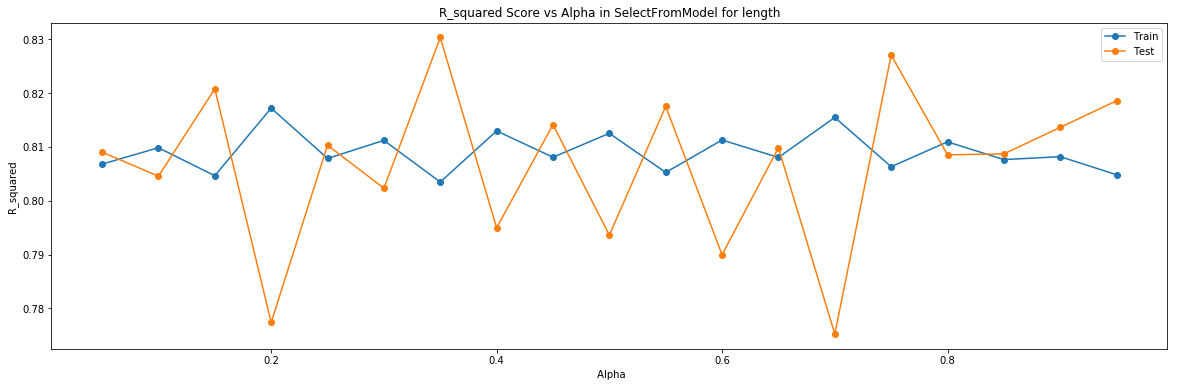

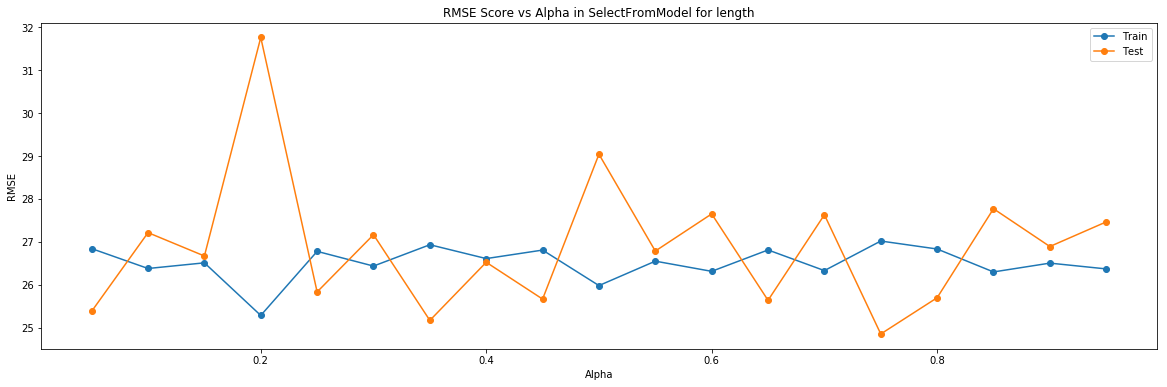

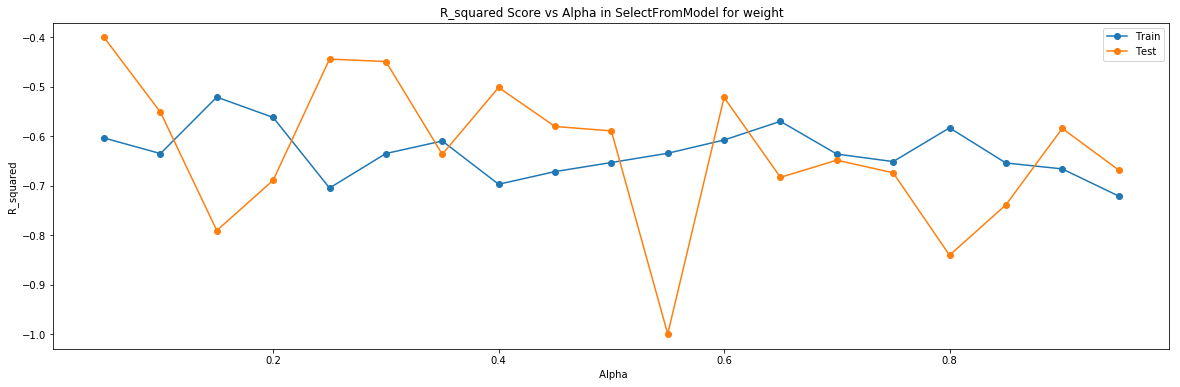

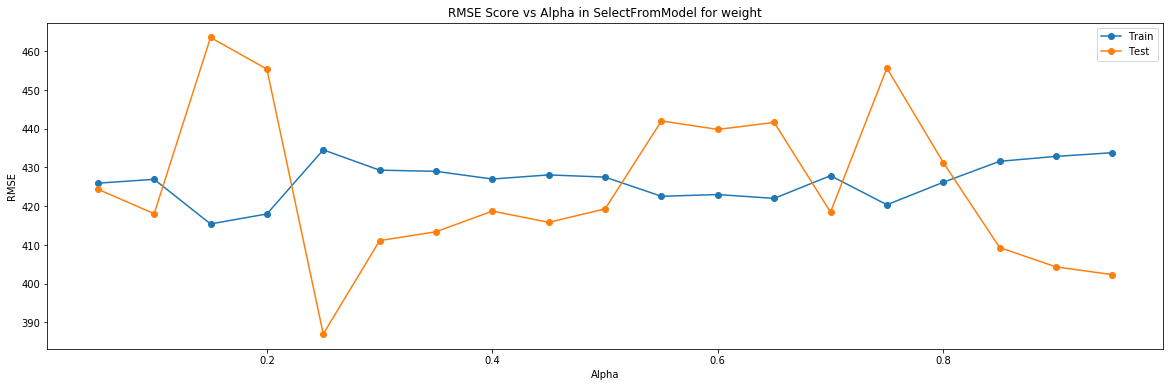

'This model is better than the previous. It is true that the RMSE for length is larger, but our r_squared is much \nbetter, making me more confident in my model. We can see slight overfitting at the end as we approach 1. The best \nscore of alpha seems to be around 0.5. That is where we have the highest R-squared and lowest RMSE On the other hand,\nthe model for weight has not improved. It is possible that there is no clear correlation between the given variants \nand weight. It is also possible that there are better ways to try to find the correct predictors and to make the \nprediction. Principal Component Analysis might be a way of doing this. I looked into how it works but I have never \nused it before. I did not have time to really go into it and understand the math behind it so I was reluctant to use \nit. I will probably do this on my own later this week.'

In [2343]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectFromModel
from sklearn.datasets import make_classification


#Run the regression for both response variables
for trait in ['length', 'weight']:
    test_r2 = []
    train_r2 = []
    test_rmse = []
    train_rmse = []
    
    y = mice_data[trait]
    
    #Try differnt alphas to determine which value is best
    for i in np.arange(0.05, 1.0, 0.05):
        
        curr_test_rmse = 0
        curr_train_rmse = 0
        curr_test_r2 = 0
        curr_train_r2 = 0
        
        attempts = 1
        for j in range(attempts):
            
            #Use default lasso because it uses L1 regularization. This means that we have a linear change 
            #even as the weights become smaller, making it more likely that we will drive weights to 0.
            #This basically removes predictors, which is what we want because of how many have and we do 
            #not want to overfit.
            clf = linear_model.Lasso()
            
            #Retrieve the best parameters
            sfm = SelectFromModel(clf, threshold = i).fit(X, y)
            selected = np.where(sfm.get_support() == True)
            new_x = X[X.columns[selected]]

            #Split the data again into test and train but based on the new model
            x_train, x_test, y_train, y_test = train_test_split(new_x, y, test_size=0.2)

            #Fit on train data and predict on both test and train to graph and look for overfitting
            reg = linear_model.LinearRegression().fit(x_train, y_train)
            prediction = reg.predict(x_test)
            prediction_train = reg.predict(x_train)

            #Calculate root mean squared error and R_squared
            curr_test_rmse += mean_squared_error(prediction, y_test)
            curr_train_rmse += mean_squared_error(prediction_train, y_train)
            curr_test_r2 += r2_score(prediction, y_test)
            curr_train_r2 += r2_score(prediction_train, y_train)
            
        #Add up score and standardize
        test_r2.append(curr_test_r2/attempts)
        train_r2.append(curr_train_r2/attempts)
        test_rmse.append(curr_test_rmse/attempts)
        train_rmse.append(curr_train_rmse/attempts)

    plt.plot(np.arange(0.05, 1.0, 0.05), train_r2, '-o', label = "Train")
    plt.plot(np.arange(0.05, 1.0, 0.05), test_r2, '-o', label = "Test")
    plt.title("R_squared Score vs Alpha in SelectFromModel for " + trait)
    plt.xlabel(" Alpha")
    plt.ylabel("R_squared")
    plt.legend()
    plt.show()

    plt.plot(np.arange(0.05, 1.0, 0.05), train_rmse, '-o', label = "Train")
    plt.plot(np.arange(0.05, 1.0, 0.05), test_rmse, '-o', label = "Test")
    plt.title("RMSE Score vs Alpha in SelectFromModel for " + trait)
    plt.xlabel("Alpha")
    plt.ylabel("RMSE")
    plt.legend()
    plt.show()

'''This model is better than the previous. It is true that the RMSE for length is larger, but our r_squared is much 
better, making me more confident in my model. We can see slight overfitting at the end as we approach 1. On the other hand,
the model for weight has not improved. It is possible that there is no clear correlation between the given variants 
and weight. It is also possible that there are better ways to try to find the correct predictors and to make the 
prediction. Principal Component Analysis might be a way of doing this. I looked into how it works but I have never 
used it before. I did not have time to really go into it and understand the math behind it so I was reluctant to use 
it. I will probably do this on my own later this week.'''

